# R applications – Part II Descriptive statistics
* 2.1 Simple descriptive statistics
* 2.2 Using factors to deal with complex datasets
* 2.3 Using factors for classification

## 2.1 Simple descriptive statistics
Early in the interpretation of a newly acquired geochemical dataset it is handy to examine descriptive statistics for selected elements or oxides. R contains a plethora of statistical tools, either built in, or provided as additional modules (packages). At this stage, however, simple functions such as `mean`, `median`, `sd` (standard deviation) and `summary` (a statistical overview) suffice. Revealing are also simple graphical tools such as boxplots (box-and-whiskers plots; function `boxplot`) and histograms (`hist`). Scatter matrices (`pairs`) serve to spot potentially significant correlations. 

<img src="images/exercise-icon.png" style="float:left;width:40px;height:40px;"> 
Let's have a look in detail onto the file `sazava.data`. First, we compute means for all columns (variables) in the data set. Then we shall display boxplot for strontium, and find out all the main statistical parameters characterizing its distribution (the range, median, number of observations and not determined cases…). Lastly, we plot all the possible combinations of binary diagrams (a scatterplot matrix) for the following oxides: SiO<sub>2</sub>, MgO, CaO, Na<sub>2</sub>O, K<sub>2</sub>O, and P<sub>2</sub>O<sub>5</sub>.

In [35]:
sazava <- read.table("data/sazava.data",sep="\t")
sazava <- sazava[,-(1:6)]         # geochemical data only (all but the first six columns) 

result <- apply(sazava,2,mean,na.rm=TRUE)
print(round(result,2))

     SiO2      TiO2     Al2O3       FeO     Fe2O3       MnO       MgO       CaO 
    57.95      0.64     16.94      4.73      1.75      0.14      3.57      8.16 
     Na2O       K2O      P2O5       CO2         F         S  H2O_PLUS H2O_MINUS 
     2.80      1.66      0.15      0.16      0.08      0.09      1.11      0.06 
       Ba        Rb        Sr        Zr        Nb        Ni        Co        Zn 
   883.25     51.50    443.00     94.67      6.67     11.17     18.80     61.08 
       Cr        La        Ce        Pr        Nd        Sm        Eu        Gd 
    67.33     20.05     42.69      4.40     16.01      3.30      1.40      3.08 
       Tb        Dy        Ho        Er        Tm        Yb        Lu         Y 
     0.44      2.48      0.46      1.33      0.20      1.38      0.22     21.79 
       Cs        Ta        Hf 
     4.12      0.54      3.50 


In [36]:
options(repr.plot.width=3, repr.plot.height=4,repr.plot.res=300)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  278.0   392.5   430.0   443.0   537.5   599.0       2 

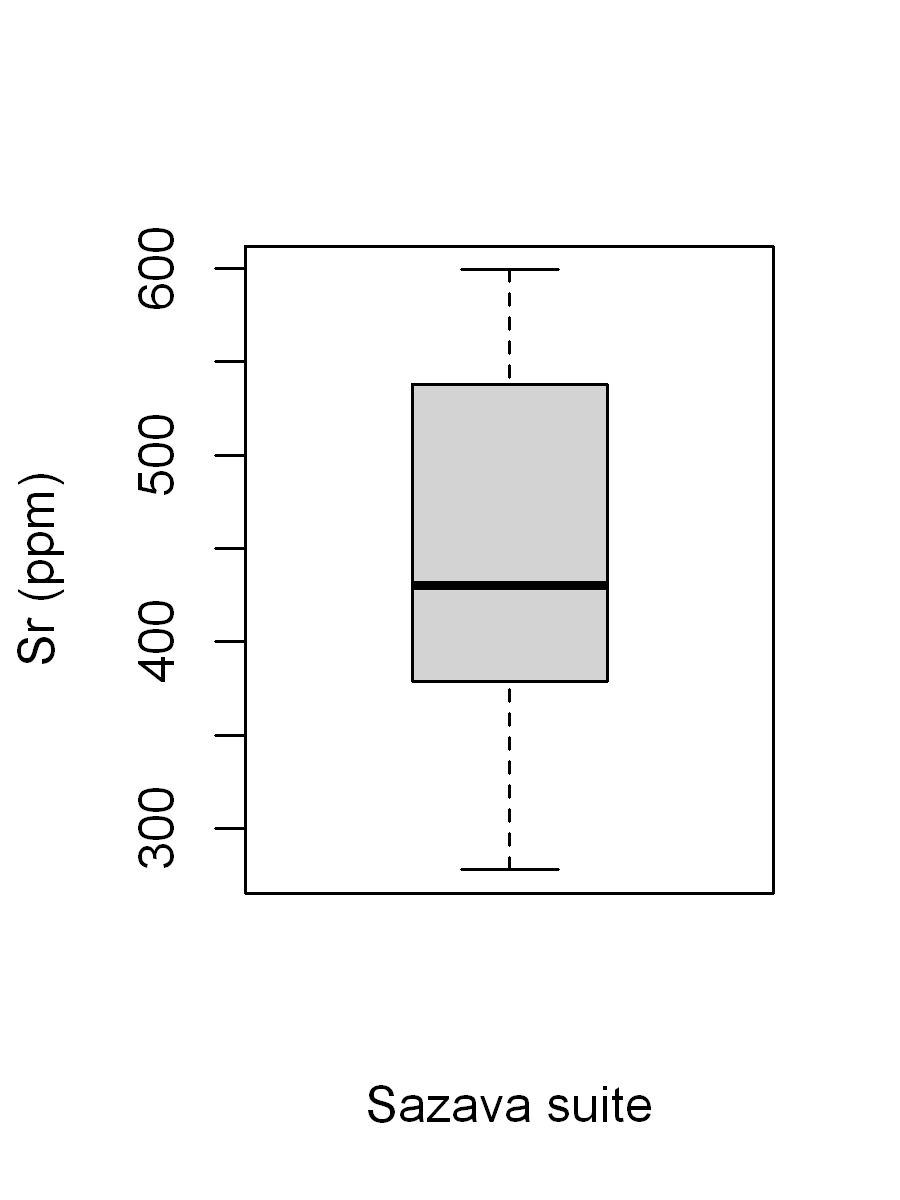

In [37]:
boxplot(sazava[,"Sr"],xlab="Sazava suite", ylab="Sr (ppm)")
summary(sazava[,"Sr"])

In [38]:
options(repr.plot.width=6, repr.plot.height=6,repr.plot.res=300)

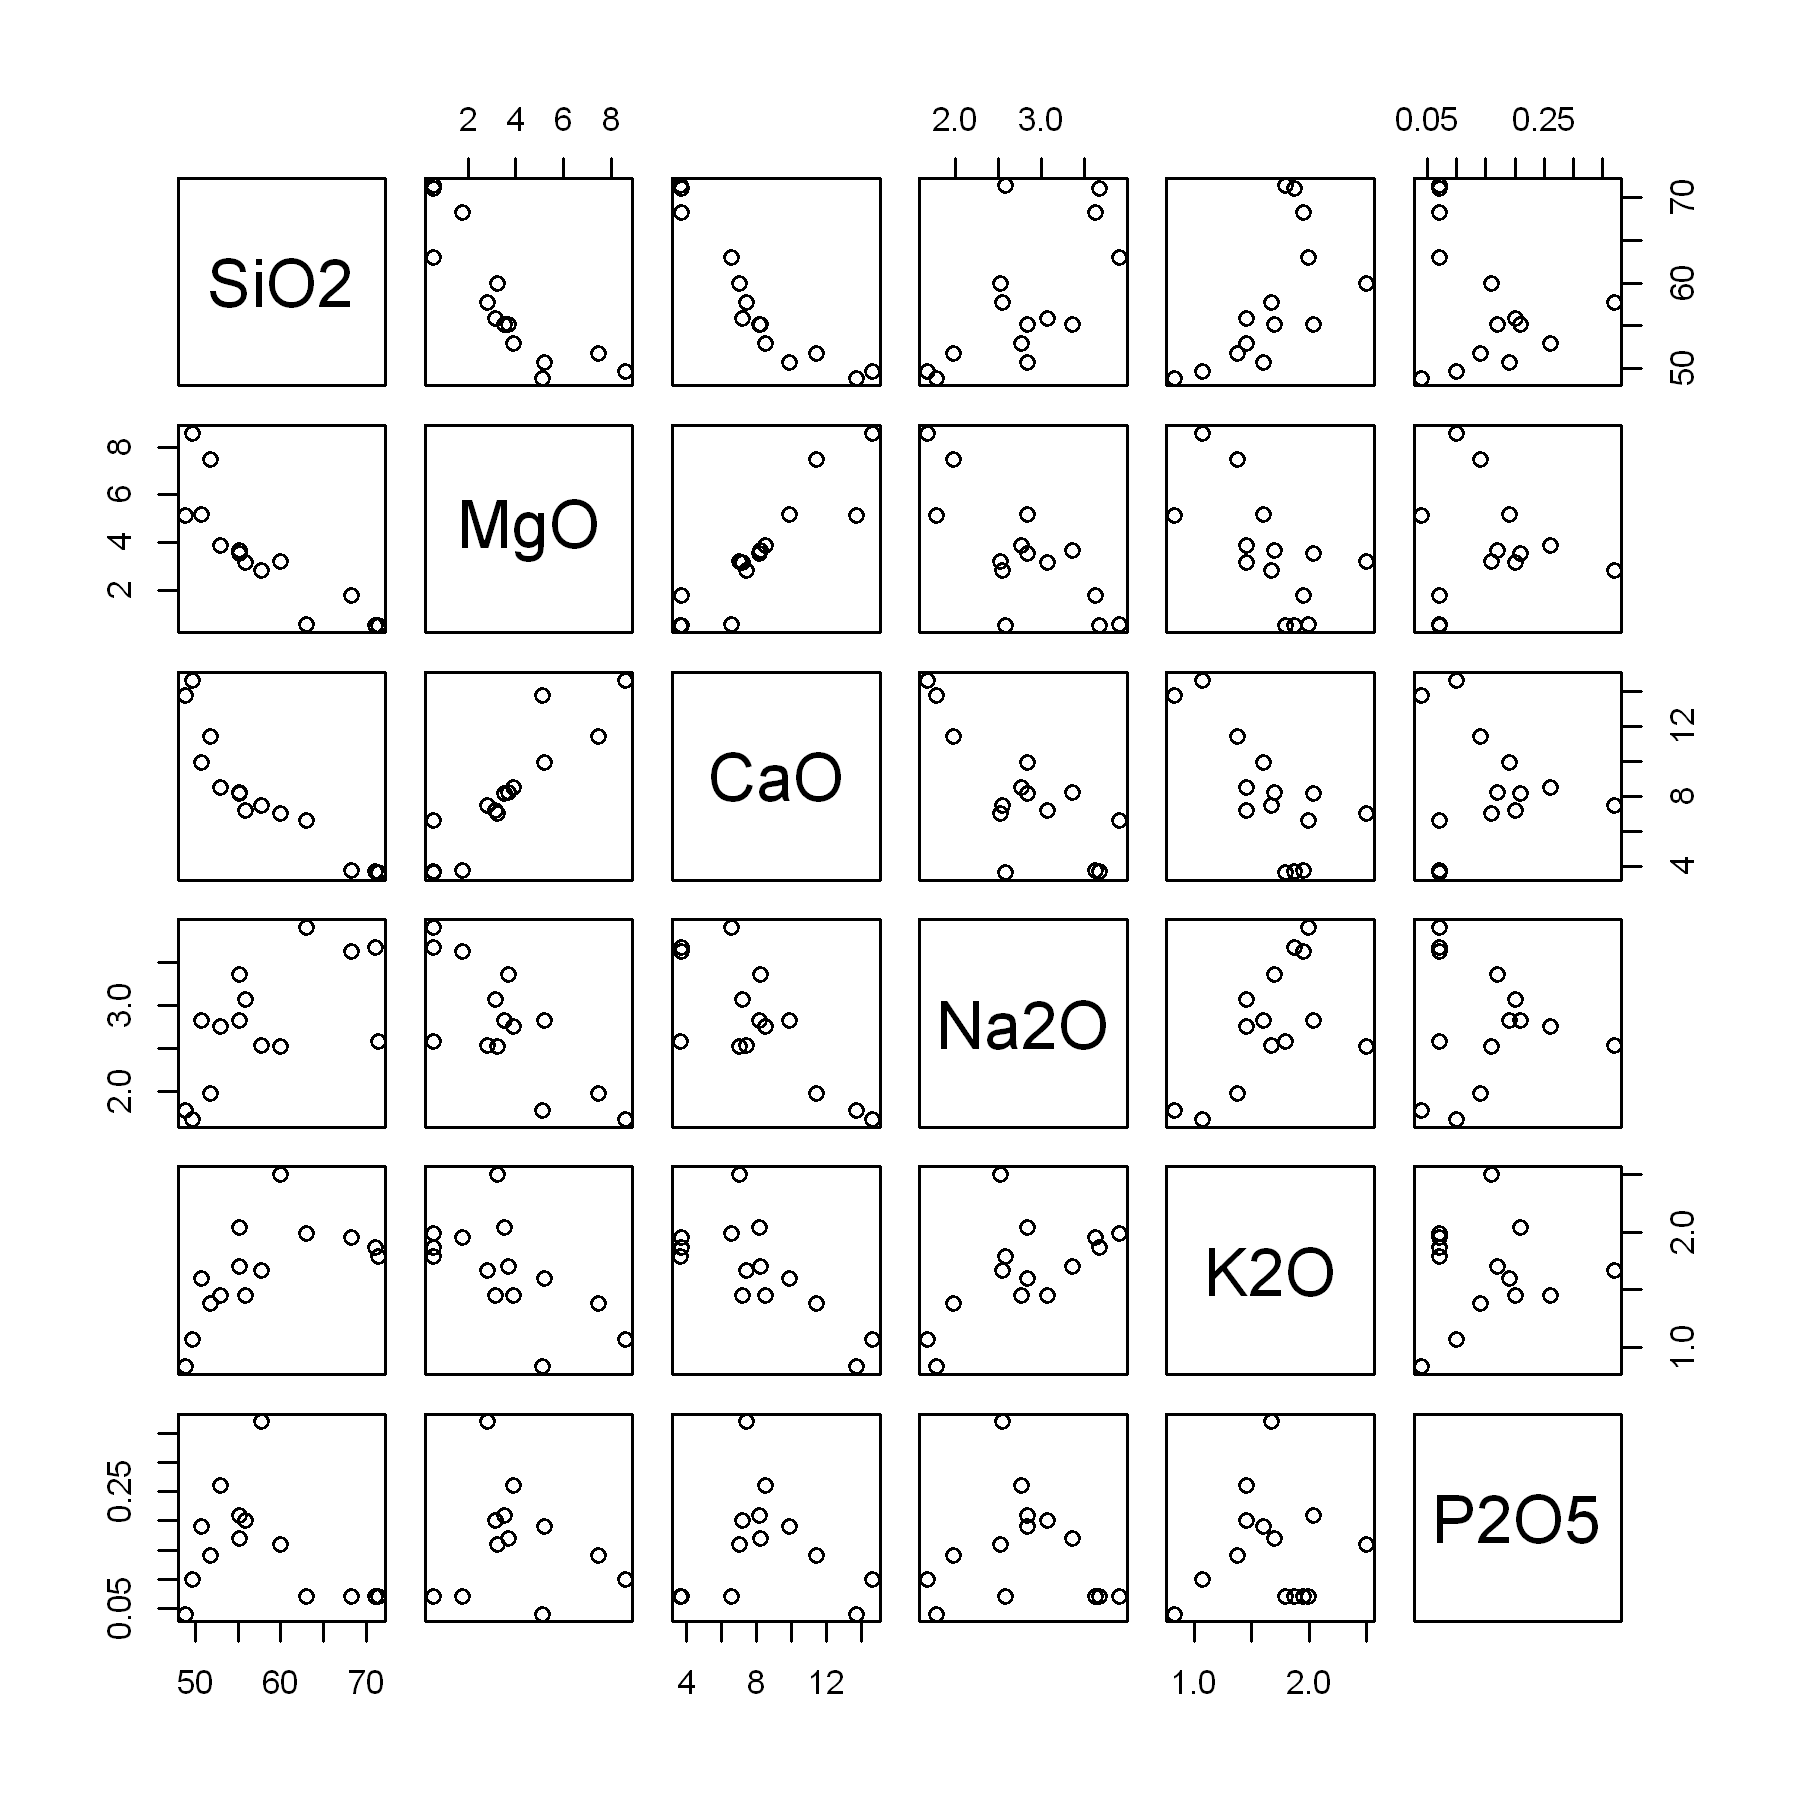

In [39]:
oxides <- c("SiO2","MgO","CaO","Na2O","K2O","P2O5")
pairs(sazava[,oxides])

## 2.2 Using factors to deal with complex datasets
Statistical examination of complex geochemical data sets including, for instance, analyses for several intrusions, is tedious. Fortunately factors in R, in connection with the function `tapply`, offer a very flexible and elegant solution. 

<img src="images/exercise-icon.png" style="float:left;width:40px;height:40px;"> 
Using the factor `intrusion`, we will calculate the mean SiO<sub>2</sub> and Ba contents for each of the pre-defined rock groups in the Sázava dataset.

In [40]:
sazava <- read.table("data/sazava.data",sep="\t")

# Defining the groups
intrusion <- factor(sazava[,"Intrusion"])
print(intrusion)
levels(intrusion)

 [1] Sazava Sazava Sazava Sazava Sazava basic  basic  basic  basic  basic 
[11] Pozary Pozary Pozary Pozary
Levels: basic Pozary Sazava


[1] "basic"  "Pozary" "Sazava"

In [41]:
cat("Mean SiO2 contents in individual groups are (wt. %):\n")
ee <- tapply(sazava[,"SiO2"],intrusion,mean)
print(ee)

Mean SiO2 contents in individual groups are (wt. %):
 basic Pozary Sazava 
51.778 68.440 55.738 


In [42]:
cat("Mean Ba contents in individual groups are (ppm):\n")
ee <- tapply(sazava[,"Ba"],intrusion,mean,na.rm=TRUE)
print(ee)

Mean Ba contents in individual groups are (ppm):
  basic  Pozary  Sazava 
 676.25 1291.25  682.25 


The R language provides additional, arguably even more powerful tools. For instance, `aggregate` applies a given function to each of the variables (columns) of a numeric matrix or data frame `x` respecting grouping (defined by a factor or list of factors). Analogous is the function `by`, which splits a data frame into several smaller ones based on a factor (or list of factors). 

<img src="images/exercise-icon.png" style="float:left;width:40px;height:40px;"> 
Utilizing the function `summary`, we shall calculate basic statistical parameters for SiO<sub>2</sub> distribution in each of the rock groups of the Sázava suite (factor `intrusion`).
What are the means for selected trace elements (Ba, Rb, Sr and Zr) in individual intrusions? 
Using the function `by`, we will display basic statistical summaries for major-element oxides in each of the rock groups.


In [43]:
sazava <- read.table("data/sazava.data",sep="\t")
intrusion <- factor(sazava[,"Intrusion"])
ee <- tapply(sazava[,"SiO2"],intrusion,summary)
print(ee)

$basic
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  48.84   49.63   51.72   51.78   52.90   55.80 

$Pozary
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  62.95   66.96   69.69   68.44   71.17   71.42 

$Sazava
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.72   55.09   55.17   55.74   57.73   59.98 



In [44]:
trace <- c("Rb","Sr","Ba","Zr")
print(aggregate(sazava[,trace],list(Rock=intrusion),mean,na.rm=TRUE))

    Rock   Rb     Sr      Ba     Zr
1  basic 34.5 346.25  676.25  65.75
2 Pozary 59.5 460.75 1291.25 157.25
3 Sazava 60.5 522.00  682.25  61.00


In [45]:
by(sazava[,7:17],list(Rock=intrusion),summary)

Rock: basic
      SiO2            TiO2           Al2O3            FeO            Fe2O3     
 Min.   :48.84   Min.   :0.340   Min.   :13.34   Min.   :2.740   Min.   :1.47  
 1st Qu.:49.63   1st Qu.:0.670   1st Qu.:14.17   1st Qu.:5.690   1st Qu.:2.44  
 Median :51.72   Median :0.760   Median :16.98   Median :6.220   Median :2.79  
 Mean   :51.78   Mean   :0.784   Mean   :16.87   Mean   :5.664   Mean   :2.64  
 3rd Qu.:52.90   3rd Qu.:0.800   3rd Qu.:18.23   3rd Qu.:6.430   3rd Qu.:3.22  
 Max.   :55.80   Max.   :1.350   Max.   :21.64   Max.   :7.240   Max.   :3.28  
      MnO             MgO             CaO             Na2O           K2O       
 Min.   :0.130   Min.   :3.160   Min.   : 7.22   Min.   :1.67   Min.   :0.830  
 1st Qu.:0.160   1st Qu.:3.890   1st Qu.: 8.55   1st Qu.:1.78   1st Qu.:1.070  
 Median :0.160   Median :5.110   Median :11.44   Median :1.97   Median :1.380  
 Mean   :0.174   Mean   :5.644   Mean   :11.12   Mean   :2.25   Mean   :1.236  
 3rd Qu.:0.170   3rd Qu.:7.4

### 2.3 Using factors for classification

The function `cut` splits a numeric vector `x` into given number of intervals and codes its individual items according to the rank they fall into. So this function can be used for simple classification purposes.

<img src="images/exercise-icon.png" style="float:left;width:40px;height:40px;"> 
We will classify samples in the Sázava set according to SiO<sub>2</sub> contents (wt. %) in four groups, U (< 45), B (45–52), I (52–63) and A (> 63), i.e. ultrabasic, basic, intermediate and acid.

In [46]:
sazava <- read.table("data/sazava.data",sep="\t")
silica <- cut(sazava[,"SiO2"],breaks=c(0,45,52,63,100),labels=c("U","B","I","A"))
acidity <- as.vector(silica)
names(acidity) <- rownames(sazava)
print(acidity)

  Sa-1   Sa-2   Sa-3   Sa-4   Sa-7  SaD-1  Gbs-1 Gbs-20  Gbs-2  Gbs-3   Po-1 
   "I"    "I"    "I"    "B"    "I"    "I"    "B"    "B"    "B"    "I"    "I" 
  Po-3   Po-4   Po-5 
   "A"    "A"    "A" 
